<a href="https://colab.research.google.com/github/no-way02/WIDS-IPL/blob/main/WEEK_4_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEEK 4

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import math,os
from numpy.random import choice
#import scikitplot as skplt
from time import time

In [ ]:
import torch
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor,ElasticNet
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor


## Data Preprocessing

In [ ]:
#Reading data from CSV file
matches = pd.read_csv('/content/drive/MyDrive/btech/ML_DS/matches.csv', error_bad_lines=False)

#reading file from drive
deliveries = pd.read_csv('/content/drive/MyDrive/btech/ML_DS/deliveries.csv', error_bad_lines=False)


In [ ]:

def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
        # else:
        #     print('p',y_pred[i]*300,y_test[i]*300)
    return (right)

In [ ]:
def custom_accuracy2(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
print(matches.shape)
matches.head()

(756, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
print(deliveries.shape)
deliveries.head()

(179078, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
data = pd.merge(left=matches, right=deliveries, left_on='id', right_on='match_id', how='right')
print(data.shape[0])


179078


In [ ]:
data['is_wicket'] = (~data['player_dismissed'].isnull()).astype('int')

In [ ]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_wicket
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,0


In [ ]:
a1 = data['venue'].unique()
a2 = data['batting_team'].unique()
a3 = data['bowling_team'].unique()
a4 = data['batsman'].unique()
a5 = data['bowler'].unique()


In [ ]:
def labelEncoding(data):
    dataset = pd.DataFrame(data)
    feature_dict ={}
      
    for feature in dataset:
        if dataset[feature].dtype==object:
            le = LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
              
    return dataset
  
labelEncoding(data)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_wicket
0,1,2017,14,470,14,13,13,1,1,0,14,35,0,224,28,6,34,25,1,1,14,13,1,1,112,391,379,0,0,0,0,0,0,0,0,0,487,9,499,0
1,1,2017,14,470,14,13,13,1,1,0,14,35,0,224,28,6,34,25,1,1,14,13,1,2,112,391,379,0,0,0,0,0,0,0,0,0,487,9,499,0
2,1,2017,14,470,14,13,13,1,1,0,14,35,0,224,28,6,34,25,1,1,14,13,1,3,112,391,379,0,0,0,0,0,0,4,0,4,487,9,499,0
3,1,2017,14,470,14,13,13,1,1,0,14,35,0,224,28,6,34,25,1,1,14,13,1,4,112,391,379,0,0,0,0,0,0,0,0,0,487,9,499,0
4,1,2017,14,470,14,13,13,1,1,0,14,35,0,224,28,6,34,25,1,1,14,13,1,5,112,391,379,0,2,0,0,0,0,0,2,2,487,9,499,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,14,38,8,0,8,0,1,0,8,1,0,85,29,38,23,15,11415,2,0,8,20,2,361,442,340,0,0,0,0,0,0,1,0,1,487,9,499,0
179074,11415,2019,14,38,8,0,8,0,1,0,8,1,0,85,29,38,23,15,11415,2,0,8,20,3,444,360,340,0,0,0,0,0,0,2,0,2,487,9,499,0
179075,11415,2019,14,38,8,0,8,0,1,0,8,1,0,85,29,38,23,15,11415,2,0,8,20,4,444,360,340,0,0,0,0,0,0,1,0,1,417,7,208,1
179076,11415,2019,14,38,8,0,8,0,1,0,8,1,0,85,29,38,23,15,11415,2,0,8,20,5,437,360,340,0,0,0,0,0,0,2,0,2,487,9,499,0


In [ ]:
data['innings'] = data['id'].astype(str)+(data['batting_team']).astype(str)
data.head()
list1 = data['innings'].unique()
(list1.shape)

(1510,)

In [ ]:
data2 = data.copy()
data2 = data2.groupby(by=['innings']).sum()['total_runs'].reset_index()
data2.head()

,innings,total_runs
0,100Delhi Daredevils,118
1,100Kings XI Punjab,94
2,101Rajasthan Royals,197
3,101Royal Challengers Bangalore,132
4,102Deccan Chargers,153


In [ ]:
data3 = pd.merge(left=data2, right=data, on='innings', how='right')
print(data3.shape)
data3.head()


(179078, 42)


,innings,total_runs_x,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,is_wicket
0,1Sunrisers Hyderabad,207,1,2017,14,470,14,13,13,1,1,0,14,35,0,224,28,6,34,25,1,1,14,13,1,1,112,391,379,0,0,0,0,0,0,0,0,0,487,9,499,0
1,1Sunrisers Hyderabad,207,1,2017,14,470,14,13,13,1,1,0,14,35,0,224,28,6,34,25,1,1,14,13,1,2,112,391,379,0,0,0,0,0,0,0,0,0,487,9,499,0
2,1Sunrisers Hyderabad,207,1,2017,14,470,14,13,13,1,1,0,14,35,0,224,28,6,34,25,1,1,14,13,1,3,112,391,379,0,0,0,0,0,0,4,0,4,487,9,499,0
3,1Sunrisers Hyderabad,207,1,2017,14,470,14,13,13,1,1,0,14,35,0,224,28,6,34,25,1,1,14,13,1,4,112,391,379,0,0,0,0,0,0,0,0,0,487,9,499,0
4,1Sunrisers Hyderabad,207,1,2017,14,470,14,13,13,1,1,0,14,35,0,224,28,6,34,25,1,1,14,13,1,5,112,391,379,0,2,0,0,0,0,0,2,2,487,9,499,0


In [ ]:
container = pd.DataFrame()
for i in range(len(list1)):
    one_inning = data3.loc[data3['innings']==list1[i]]
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball',
            'batsman_runs','total_runs_y','is_wicket','total_runs_x','venue', 'inning','batting_team',
             'bowling_team', 'batsman','bowler']].reset_index(drop=True)
    one_inning['CUMSUM_runs'] = one_inning['total_runs_y'].cumsum()
    one_inning['CUMSUM_wickets'] = one_inning['is_wicket'].cumsum()

    one_inning.tail()
    frame = [container,one_inning]
    container = pd.concat(frame)
print(data3.shape)
print(container.shape)


(179078, 42)
(179078, 14)


In [ ]:
container['over'] = container['over'] + container['ball']/10

In [ ]:
container.head()


,over,ball,batsman_runs,total_runs_y,is_wicket,total_runs_x,venue,inning,batting_team,bowling_team,batsman,bowler,CUMSUM_runs,CUMSUM_wickets
0,1.1,1,0,0,0,207,28,1,14,13,112,379,0,0
1,1.2,2,0,0,0,207,28,1,14,13,112,379,0,0
2,1.3,3,4,4,0,207,28,1,14,13,112,379,4,0
3,1.4,4,0,0,0,207,28,1,14,13,112,379,4,0
4,1.5,5,0,2,0,207,28,1,14,13,112,379,6,0




* Dont use less no of datasets





In [ ]:
container = container[:50000] 
container.shape


(50000, 14)

## DL

In [ ]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
        # else:
        #     print('p',y_pred[i]*300,y_test[i]*300)
    return (right)

In [ ]:
def custom_accuracy2(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
	'''
	scikit(sklearn) does not have support for mean absolute percentage error MAPE.
	This is because the denominator can theoretically be 0 and so the value would be undefined.
	So this is our implementation
	'''
# 	y_true = check_array(y_true)
# 	y_pred = check_array(y_pred)

	return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def r2(y_true,y_pred):
    return roundup(r2_score(y_true,y_pred))

def mse(y_true,y_pred):
    return roundup(mean_squared_error(y_true,y_pred))

def mae(y_true,y_pred):
    return roundup(mean_absolute_error(y_true,y_pred))

def mape(y_true, y_pred):
    return roundup(mean_absolute_percentage_error(y_true,y_pred))

def roundup(a, digits=4):
    n = 10**-digits
    return round(math.ceil(a / n) * n, digits)

def isEven(num):
    if num%2 ==0:
        return True
    return False

def modLog(num):
    try:
        return log(num)
    except:
        return 0

def loadNumpy(name,path='.'):
    if ".npy" in name:
        fullPath = path+'/'+name
    else:
        fullPath = path+'/'+name+'.npy'
    return np.load(fullPath, allow_pickle=True)

In [ ]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:


dataset = container[['over', 'ball','CUMSUM_runs',
             'CUMSUM_wickets','total_runs_x']]


In [ ]:
dataset.head()

,over,ball,CUMSUM_runs,CUMSUM_wickets,total_runs_x
0,1.1,1,0,0,207
1,1.2,2,0,0,207
2,1.3,3,4,0,207
3,1.4,4,4,0,207
4,1.5,5,6,0,207


In [ ]:
dataset_size = len(dataset)
split = int(np.floor((0.05) * dataset_size))
indices = list(range(len(dataset)))
# np.random.seed(random_seed)
# np.random.shuffle(indices)
df_train = dataset.iloc[split:,:]
df_test = dataset.iloc[:split,:]

# print(df_train.describe())

# print(df_test.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train1 = sc.fit_transform(df_train.iloc[:,:-1])
df_train1 = pd.DataFrame(df_train1)
df_train1['label']  = df_train.iloc[:,-1].values/300
df_train = df_train1.copy()
#X_test = sc.transform(X_test)
# x = df_train.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_fit = min_max_scaler.fit(x)
# print(min_max_scaler.data_max_)
# x_scaled = min_max_scaler.fit_transform(x)
# df_train = pd.DataFrame(x_scaled)
df_train = pd.DataFrame(df_train)
df_train = df_train.astype(float)
display(df_train.head())

sc = StandardScaler()
df_test1 = sc.fit_transform(df_test.iloc[:,:-1])
df_test1 = pd.DataFrame(df_test1)
df_test1['label']  = df_test.iloc[:,-1].values/300
df_test = df_test1.copy()
# x = df_test.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df_test = pd.DataFrame(x_scaled)
df_test = pd.DataFrame(df_test)
df_test = df_test.astype(float)
display(df_test.head())

print('Size of training data :', df_train.shape[0])
print('Size of test data :', df_test.shape[0])

,0,1,2,3,label
0,-1.298495,-1.446949,-1.110537,-1.208489,0.57
1,-1.280885,-0.895874,-1.089766,-1.208489,0.57
2,-1.263274,-0.344799,-1.089766,-1.208489,0.57
3,-1.245663,0.206276,-1.006682,-1.208489,0.57
4,-1.228053,0.757351,-0.923597,-1.208489,0.57


,0,1,2,3,label
0,-1.640004,-1.444298,-1.622250,-1.146753,0.69
1,-1.622287,-0.896717,-1.622250,-1.146753,0.69
2,-1.604571,-0.349137,-1.539731,-1.146753,0.69
3,-1.586855,0.198443,-1.539731,-1.146753,0.69
4,-1.569138,0.746023,-1.498471,-1.146753,0.69


Size of training data : 47500
Size of test data : 2500


In [ ]:
class CustomDatasetFromCSV(Dataset):
    def __init__(self, data, transform=None):
        self.data = data 
        self.transforms = transforms
        self.to_tensor = transforms.ToTensor()

    def __getitem__(self, index):
        target = self.data.iloc[index,-1]
        data_val = self.data.iloc[index,:-1]
        target = torch.tensor(target,dtype=torch.float32)
        data_val = torch.tensor(data_val,dtype=torch.float32) 
        return data_val,target

    def __len__(self):
        return len(self.data)


dataset_trainval = CustomDatasetFromCSV(df_train)
dataset_test = CustomDatasetFromCSV(df_test)
batch_size = 128
validation_split = 0.075
#test_split = .15
shuffle_dataset = True
random_seed= 42

dataset_size = len(dataset_trainval)
indices = list(range(dataset_size))
split = int(np.floor((validation_split) * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size, 
                                           sampler=train_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size,
                                                sampler=valid_sampler,drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=128,
                                                drop_last=True)

In [ ]:
class mymodel(torch.nn.Module):
    def __init__(self, D_in, H1, H2, H3, H4, H5, H6, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(mymodel, self).__init__()
        # self.input_linear = torch.nn.Linear(D_in, H)
        # self.output_linear = torch.nn.Linear(H, D_out)
        self.linear1 = nn.Linear(D_in, H1)
        self.norm1 = nn.BatchNorm1d(H1)
        self.linear2 = nn.Linear(H1, H2)
        self.norm2 = nn.BatchNorm1d(H2)
        self.linear3 = nn.Linear(H2, H3)
        self.norm3 = nn.BatchNorm1d(H3)
        self.linear4 = nn.Linear(H3, H4)
        self.norm4 = nn.BatchNorm1d(H4)
        self.linear5 = nn.Linear(H4, H5)
        self.linear6 = nn.Linear(H5, H6)
        self.linear7 = nn.Linear(H6, D_out)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.leaky_relu(self.norm1(self.linear1(x)))
        x = F.leaky_relu(self.norm2(self.linear2(x)))
        x = F.leaky_relu(self.norm3(self.linear3(x)))
        x = F.leaky_relu(self.norm4(self.linear4(x)))
        x = F.leaky_relu(self.linear5(x))
        x = F.leaky_relu(self.linear6(x))
        x = self.linear7(x)
        #print(x.shape[0])
        return x.view(batch_size)
        # x = x.view(x.shape[0])
        # return x            

In [ ]:
D_in, H1, H2, H3, H4, H5, H6, D_out = 4, 64, 128, 256, 128, 128, 64, 1

In [ ]:
print(len(train_loader))
print(len(validation_loader))
print(len(test_loader))

343
27
19


In [ ]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return (right)

In [ ]:
model = mymodel(D_in, H1, H2, H3, H4, H5, H6, D_out)
print(model)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
if torch.cuda.is_available():
    model.to('cuda')

mymodel(
  (linear1): Linear(in_features=4, out_features=64, bias=True)
  (norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=64, out_features=128, bias=True)
  (norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=128, out_features=256, bias=True)
  (norm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (norm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear5): Linear(in_features=128, out_features=128, bias=True)
  (linear6): Linear(in_features=128, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 100,545 trainable parameters


In [ ]:
# %%time
step = 0
epochs = 200
train_loss_list = []
valid_loss_list = []
train_acc_l = []
val_acc_l = []
validation_acc_l = []

for e in range(epochs):
    running_loss_train = 0 
    running_loss_valid = 0
    validation_r2 = 0
    train_r2 = 0


    for inputs, labels in train_loader:

        # Clear the gradients of all optimized tensors
        #print(inputs)
        #print(inputs,labels)
        optimizer.zero_grad()
        if torch.cuda.is_available():
            inputs, labels = inputs.to('cuda'), labels.to('cuda')   
        else:
            inputs, labels = inputs, labels        
        # Forward pass
        model.train()
        #print(type(inputs))
        outputs = model.forward(inputs)
        predicted = outputs.data
        #print(predicted,labels)
        #print(labels,predicted)
        #print(predicted,labels)
    
        #print(predicted,labels)

        #training_total += labels.size(0)
                
        train_loss = criterion(outputs, labels)
        train_r2_ =  r2(outputs.detach().cpu().numpy(), labels.detach().cpu().numpy())
        #training_correct += r2_loss
        
        #train_acc = training_correct
        # Backward pass
        train_loss.backward()
        optimizer.step()
        
        # Calculate and print running training loss
        running_loss_train += train_loss.item()  
        train_r2 +=  train_r2_
    validation_correct = 0
    validation_total = 0

        
    with torch.no_grad():    
            #count=0         
            # Iterate over the entire validation dataset
            for input_images2, labels2 in validation_loader:
                
                # Enable CUDA: use GPUs for model computation
                #count+=1
                #print(count)
                if torch.cuda.is_available():
                    input_images2, labels2 = input_images2.to('cuda'), labels2.to('cuda')
                
                # Make predictions 
                outputs2 = model.forward(input_images2)
                predicted2 = outputs2.data
                #print(predicted2,labels2)
                valid_r2_ =  r2(outputs2.detach().cpu().numpy(), labels2.detach().cpu().numpy())
                # Count total and correct predictions
                validation_total += labels2.size(0)
                validation_correct += custom_accuracy(labels2,predicted2,10/300)  
                #val_acc = custom_accuracy(labels2,predicted2)
                valid_loss = criterion(outputs2, labels2)
                # val_acc = validation_correct / validation_total
                running_loss_valid += valid_loss.item()  
                validation_r2 +=  valid_r2_

    val_acc = validation_correct / validation_total

    print("Epoch: {}/{}... ".format(e+1, epochs),
          "| Train Loss: {:.4f}".format(running_loss_train/len(train_loader)),
          "| Val Loss: {:.4f}".format(running_loss_valid/len(validation_loader)),
          "| Train R2: {:.4f}".format(train_r2/len(train_loader)),
          "| Val R2: {:.4f}".format(validation_r2/len(validation_loader)),
          "| Val Acc: {:.4f} %".format(val_acc*100))
    train_loss_list.append(running_loss_train/len(train_loader))
    valid_loss_list.append(running_loss_valid/len(validation_loader))
    train_acc_l.append(train_r2/len(train_loader))
    val_acc_l.append(validation_r2/len(validation_loader))
    validation_acc_l.append(val_acc*100)

          
    running_loss_train = 0
    running_loss_valid = 0

Epoch: 1/200...  | Train Loss: 0.0085 | Val Loss: 0.0066 | Train R2: -1.0366 | Val R2: -0.3007 | Val Acc: 40.1331 %
Epoch: 2/200...  | Train Loss: 0.0064 | Val Loss: 0.0061 | Train R2: -0.2936 | Val R2: -0.3068 | Val Acc: 39.9884 %
Epoch: 3/200...  | Train Loss: 0.0062 | Val Loss: 0.0067 | Train R2: -0.2787 | Val R2: -0.0535 | Val Acc: 36.3426 %
Epoch: 4/200...  | Train Loss: 0.0062 | Val Loss: 0.0059 | Train R2: -0.2872 | Val R2: -0.3229 | Val Acc: 43.4028 %
Epoch: 5/200...  | Train Loss: 0.0061 | Val Loss: 0.0060 | Train R2: -0.2686 | Val R2: -0.2343 | Val Acc: 42.1296 %
Epoch: 6/200...  | Train Loss: 0.0060 | Val Loss: 0.0059 | Train R2: -0.2537 | Val R2: -0.1633 | Val Acc: 44.2130 %
Epoch: 7/200...  | Train Loss: 0.0060 | Val Loss: 0.0059 | Train R2: -0.2461 | Val R2: -0.1472 | Val Acc: 43.5185 %
Epoch: 8/200...  | Train Loss: 0.0060 | Val Loss: 0.0058 | Train R2: -0.2536 | Val R2: -0.3292 | Val Acc: 43.5185 %
Epoch: 9/200...  | Train Loss: 0.0059 | Val Loss: 0.0058 | Train R2: -0.

In [ ]:
with torch.no_grad(): 
      model.eval()  
      test_total=0 
      test_correct=0
      for input_images3, labels3 in test_loader:

          if torch.cuda.is_available():
              input_images3, labels3 = input_images3.to('cuda'), labels3.to('cuda')
          
          outputs3= model.forward(input_images3)
          predicted3 = outputs3.data
          #print(predicted3, labels3)
          test_r2_ =  r2(outputs3.detach().cpu().numpy(), labels3.detach().cpu().numpy())
          test_total += labels3.size(0)
          test_correct += custom_accuracy(labels3,predicted2,40/300) 
          #print(test_correct)
          test_r2_ +=  test_r2_

In [ ]:
test_acc = test_correct/test_total*100
test_r2 = test_r2_/test_total
print(test_acc,test_r2)

78.53618421052632 -0.0004954769736842105


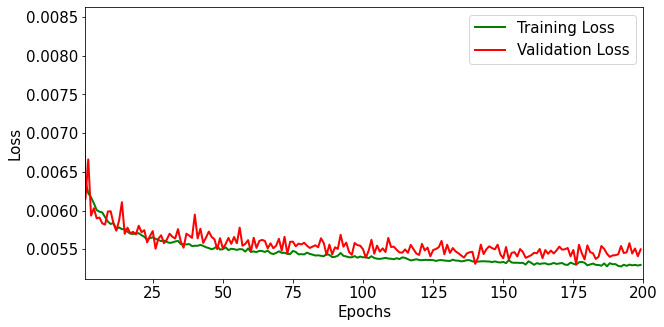

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_loss_list,c='g',label="Training Loss",linewidth=2)
plt.plot(valid_loss_list,c='r',label="Validation Loss",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,200)
plt.legend()
plt.show()

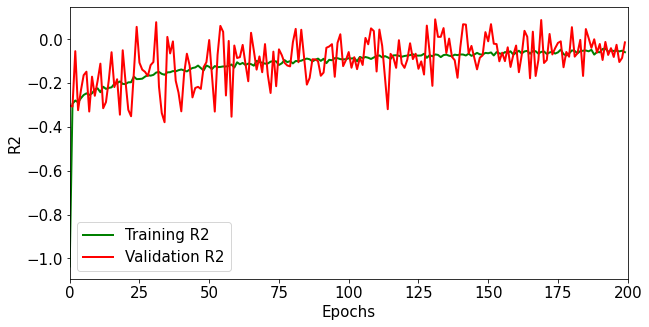

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_acc_l[0:],c='g',label="Training R2",linewidth=2)
plt.plot(val_acc_l[0:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.xlim(0,200)
plt.legend()
plt.show()

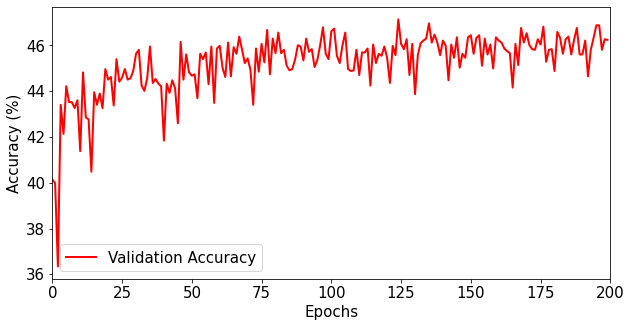

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(validation_acc_l[0:],c='r',label="Validation Accuracy",linewidth=2)
#plt.plot(val_acc_l[5:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xlim(0,200)
plt.legend()
plt.show() 

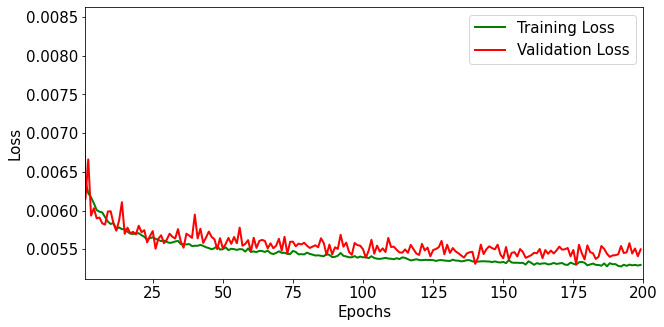

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_loss_list,c='g',label="Training Loss",linewidth=2)
plt.plot(valid_loss_list,c='r',label="Validation Loss",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,200)
plt.legend()
plt.show()

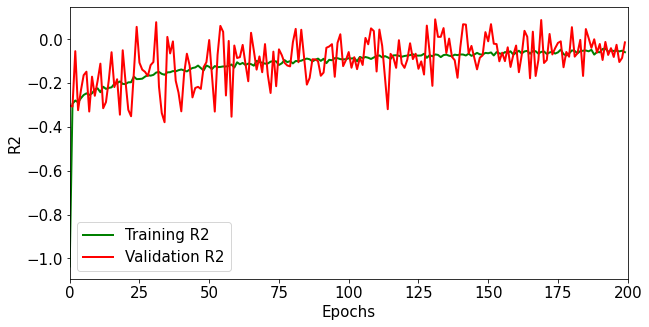

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_acc_l[0:],c='g',label="Training R2",linewidth=2)
plt.plot(val_acc_l[0:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.xlim(0,200)
plt.legend()
plt.show()

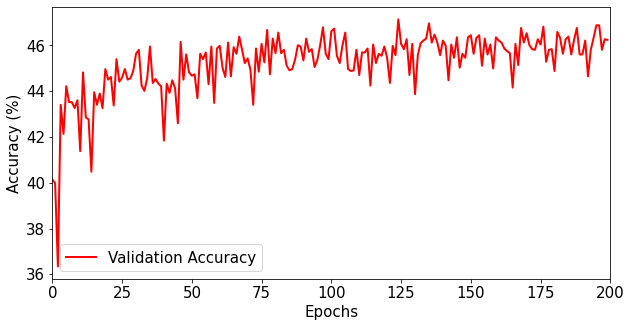

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(validation_acc_l[0:],c='r',label="Validation Accuracy",linewidth=2)
#plt.plot(val_acc_l[5:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xlim(0,200)
plt.legend()
plt.show() 